In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_GARCH_CSA
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
def create_sim(sim_num = 500, stock_num = 100, sim_length = 500):
    lls, phi, alpha, beta, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = Panel_GARCH_CSA(plot = False)
    
    for i in range(sim_num):
        np.random.seed(i)
        y, _, _ = model.simulate(num = stock_num, length = sim_length)
        start = time.time()
        model.fit(['01', '01', '01'], y)
        runtime[i] = time.time() - start
        print("{}st iteration's runTime: {} sec.\n".format(i+1, round(runtime[i], 4)))
        lls[i], phi[i], alpha[i], beta[i] = model.opt.fun, model.optimized_params[0], model.optimized_params[1], model.optimized_params[2]
        
    return lls, phi, alpha, beta, runtime

In [ ]:
#sim500 = pd.DataFrame(create_sim()) Done

In [ ]:
#sim500_dp = pd.DataFrame(create_sim(stock_num = 200)) Done

In [ ]:
#sim500_qp = pd.DataFrame(create_sim(stock_num = 300)) Done

In [ ]:
#sim1000 = pd.DataFrame(create_sim(sim_length = 1000)) Done

In [ ]:
#sim1000_dp = pd.DataFrame(create_sim(stock_num = 200, sim_length = 1000)) Done

In [ ]:
#sim1000_qp = pd.DataFrame(create_sim(stock_num = 300, sim_length = 1000)) Done

In [ ]:
#sim2000 = pd.DataFrame(create_sim(sim_length = 2000)) Done

In [ ]:
#sim2000_dp = pd.DataFrame(create_sim(stock_num = 200, sim_length = 2000)) Done

In [ ]:
#sim2000_qp = pd.DataFrame(create_sim(stock_num = 300, sim_length = 2000)) Done

In [2]:
sim1000 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_1000_v2.csv')

In [3]:
sim1000_dp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_1000_dp_v2.csv')

In [4]:
sim1000_qp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_1000_qp_v2.csv')

In [5]:
sim500 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_500_v2.csv')

In [6]:
sim500_dp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_500_dp_v2.csv')

In [7]:
sim500_qp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_500_qp_v2.csv')

In [8]:
sim2000 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_2000_v2.csv')

In [9]:
sim2000_dp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_2000_dp_v2.csv')

In [10]:
sim2000_qp = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_2000_qp_v2.csv')

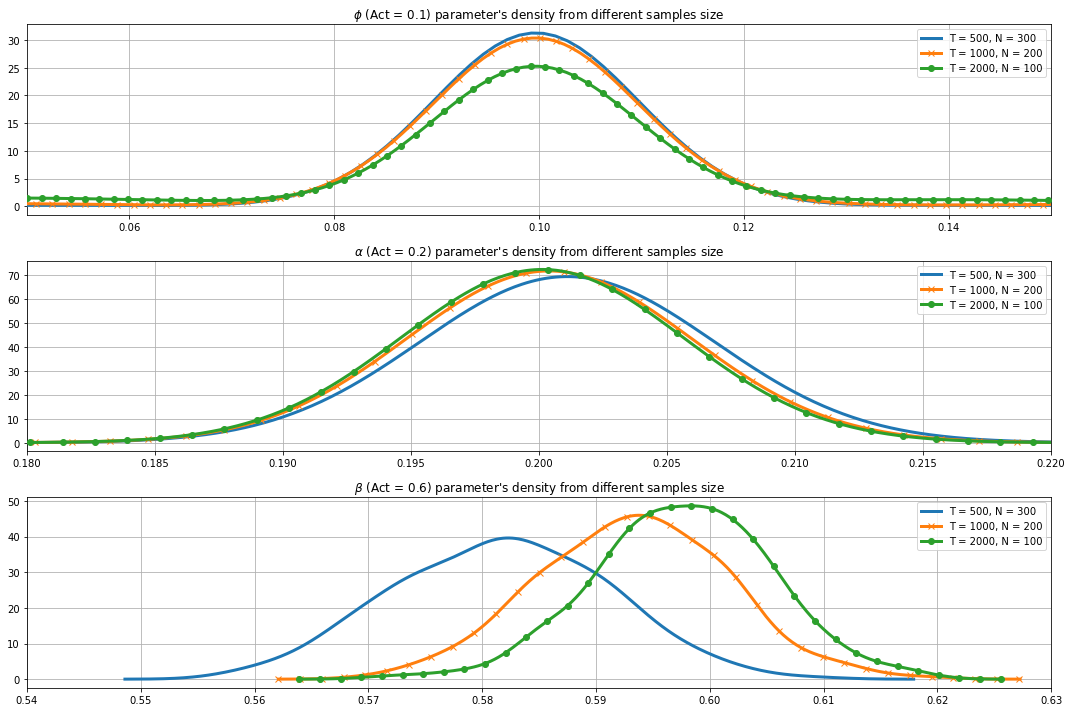

In [30]:
#phi_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 2].values)
#phi_500.fit(bw = 0.01)
#phi_500_dp = sm.nonparametric.KDEUnivariate(sim500_dp.iloc[:, 2].values)
#phi_500_dp.fit(bw = 0.01)
phi_500_qp = sm.nonparametric.KDEUnivariate(sim500_qp.iloc[:, 2].values)
phi_500_qp.fit(bw = 0.01)
#phi_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
#phi_1000.fit(bw = 0.01)
phi_1000_dp = sm.nonparametric.KDEUnivariate(sim1000_dp.iloc[:, 2].values)
phi_1000_dp.fit(bw = .01)
#phi_1000_qp = sm.nonparametric.KDEUnivariate(sim1000_qp.iloc[:, 2].values)
#phi_1000_qp.fit(bw = .01)
phi_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 2].values)
phi_2000.fit(bw = .01)
#phi_2000_dp = sm.nonparametric.KDEUnivariate(sim2000_dp.iloc[:, 2].values)
#phi_2000_dp.fit(bw = .01)
#phi_2000_qp = sm.nonparametric.KDEUnivariate(sim2000_qp.iloc[:, 2].values)
#phi_2000_qp.fit(bw = .01)

#alpha_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 3].values)
#alpha_500.fit()
#alpha_500_dp = sm.nonparametric.KDEUnivariate(sim500_dp.iloc[:, 3].values)
#alpha_500_dp.fit()
alpha_500_qp = sm.nonparametric.KDEUnivariate(sim500_qp.iloc[:, 3].values)
alpha_500_qp.fit(bw = 0.005)
#alpha_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 3].values)
#alpha_1000.fit()
alpha_1000_dp = sm.nonparametric.KDEUnivariate(sim1000_dp.iloc[:, 3].values)
alpha_1000_dp.fit(bw = 0.005)
#alpha_1000_qp = sm.nonparametric.KDEUnivariate(sim1000_qp.iloc[:, 3].values)
#alpha_1000_qp.fit()
alpha_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 3].values)
alpha_2000.fit(bw = 0.005)
#alpha_2000_dp = sm.nonparametric.KDEUnivariate(sim2000_dp.iloc[:, 3].values)
#alpha_2000_dp.fit()
#alpha_2000_qp = sm.nonparametric.KDEUnivariate(sim2000_qp.iloc[:, 3].values)
#alpha_2000_qp.fit()

#beta_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 4].values)
#beta_500.fit()
#beta_500_dp = sm.nonparametric.KDEUnivariate(sim500_dp.iloc[:, 4].values)
#beta_500_dp.fit()
beta_500_qp = sm.nonparametric.KDEUnivariate(sim500_qp.iloc[:, 4].values)
beta_500_qp.fit()
#beta_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 4].values)
#beta_1000.fit()
beta_1000_dp = sm.nonparametric.KDEUnivariate(sim1000_dp.iloc[:, 4].values)
beta_1000_dp.fit()
#beta_1000_qp = sm.nonparametric.KDEUnivariate(sim1000_qp.iloc[:, 4].values)
#beta_1000_qp.fit()
beta_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 4].values)
beta_2000.fit()
#beta_2000_dp = sm.nonparametric.KDEUnivariate(sim2000_dp.iloc[:, 4].values)
#beta_2000_dp.fit()
#beta_2000_dp = sm.nonparametric.KDEUnivariate(sim2000_dp.iloc[:, 4].values)
#beta_2000_dp.fit()
#beta_2000_qp = sm.nonparametric.KDEUnivariate(sim2000_qp.iloc[:, 4].values)
#beta_2000_qp.fit()

fig , ax = plt.subplots(3, 1, figsize=(15, 10), tight_layout=True)

#ax[0].plot(phi_500.support, phi_500.density, lw = 3, label = 'T = 500, N = 100', zorder = 10)
#ax[0].plot(phi_500_dp.support, phi_500_dp.density, lw = 3, label = 'T = 500, N = 200', zorder = 10)
ax[0].plot(phi_500_qp.support, phi_500_qp.density, lw = 3, label = 'T = 500, N = 300', zorder = 10)
#ax[0].plot(phi_1000.support, phi_1000.density, lw = 3, label = 'T = 1000, N = 100', zorder = 10)
ax[0].plot(phi_1000_dp.support, phi_1000_dp.density, lw = 3, label = 'T = 1000, N = 200', zorder = 10, marker = 'x', markevery=2)
#ax[0].plot(phi_1000_qp.support, phi_1000_qp.density, lw = 3, label = 'T = 1000, N = 300', zorder = 10)
ax[0].plot(phi_2000.support, phi_2000.density, lw = 3, label = 'T = 2000, N = 100', zorder = 10, marker = 'o', markevery=2)
#ax[0].plot(phi_2000_dp.support, phi_2000_dp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
#ax[0].plot(phi_2000_qp.support, phi_2000_qp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
ax[0].set_title(r'$\phi$'+" (Act = 0.1) parameter's density from different samples size")
ax[0].grid(True, zorder = -5)
ax[0].set_xlim((0.05, 0.15))
ax[0].legend(loc = 'best')

#ax[1].plot(alpha_500.support, alpha_500.density, lw = 3, label = 'T = 500, N = 100', zorder = 10)
#ax[1].plot(alpha_500_dp.support, alpha_500_dp.density, lw = 3, label = 'T = 500, N = 200', zorder = 10)
ax[1].plot(alpha_500_qp.support, alpha_500_qp.density, lw = 3, label = 'T = 500, N = 300', zorder = 10)
#ax[1].plot(alpha_1000.support, alpha_1000.density, lw = 3, label = 'T = 1000, N = 100', zorder = 10)
ax[1].plot(alpha_1000_dp.support, alpha_1000_dp.density, lw = 3, label = 'T = 1000, N = 200', zorder = 10, marker = 'x', markevery=15)
#ax[1].plot(alpha_1000_qp.support, alpha_1000_qp.density, lw = 3, label = 'T = 1000, N = 300', zorder = 10)
ax[1].plot(alpha_2000.support, alpha_2000.density, lw = 3, label = 'T = 2000, N = 100', zorder = 10, marker = 'o', markevery=15)
#ax[1].plot(alpha_2000_dp.support, alpha_2000_dp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
#ax[1].plot(alpha_2000_qp.support, alpha_2000_qp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
ax[1].set_title(r'$\alpha$'+" (Act = 0.2) parameter's density from different samples size")
ax[1].grid(True, zorder = -5)
ax[1].set_xlim((0.18, 0.22))
ax[1].legend(loc = 'best')

#ax[2].plot(beta_500.support, beta_500.density, lw = 3, label = 'T = 500, N = 100', zorder = 10)
#ax[2].plot(beta_500_dp.support, beta_500_dp.density, lw = 3, label = 'T = 500, N = 200', zorder = 10)
ax[2].plot(beta_500_qp.support, beta_500_qp.density, lw = 3, label = 'T = 500, N = 300', zorder = 10)
#ax[2].plot(beta_1000.support, beta_1000.density, lw = 3, label = 'T = 1000, N = 100', zorder = 10)
ax[2].plot(beta_1000_dp.support, beta_1000_dp.density, lw = 3, label = 'T = 1000, N = 200', zorder = 10, marker = 'x', markevery=15)
#ax[2].plot(beta_1000_qp.support, beta_1000_qp.density, lw = 3, label = 'T = 1000, N = 300', zorder = 10)
ax[2].plot(beta_2000.support, beta_2000.density, lw = 3, label = 'T = 2000, N = 100', zorder = 10, marker = 'o', markevery=15)
#ax[2].plot(beta_2000_dp.support, beta_2000_dp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
#ax[2].plot(beta_2000_qp.support, beta_2000_qp.density, lw = 3, label = 'T = 2000, N = 200', zorder = 10)
ax[2].set_title(r'$\beta$'+" (Act = 0.6) parameter's density from different samples size")
ax[2].grid(True, zorder = -5)
ax[2].set_xlim((0.54, 0.630))
ax[2].legend(loc = 'best')


plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/pgcsa_sim.png')
plt.show()